# Introduction to Mathematical Optimization - Lab Solutions

This notebook contains solutions for the mathematical optimization lab exercises.


In [2]:
# Install required packages
%pip install -q -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import numpy and pyplot libraries
import numpy as np
import math 
import matplotlib.pyplot as plt


## Exercise 1: Function Plotting and Analytical Determination of Critical Points

Determine *analytically* the coordinates and nature of the critical points of the following functions:
- $f_1(x,y) = x^3 + y^3 - 3x - 12y$
- $f_2(x,y) = x^3 - 12xy + 8y^3$
- $f_3(x,y) = (x-1)^2 + 10(x^2-y)^2$



In [4]:
# Define the three functions
def f1(x, y):
    """f1(x,y) = x^3 + y^3 - 3x - 12y"""
    return x**3 + y**3 - 3*x - 12*y

def f2(x, y):
    """f2(x,y) = x^3 - 12xy + 8y^3"""
    return x**3 - 12*x*y + 8*y**3

def f3(x, y):
    """f3(x,y) = (x-1)^2 + 10(x^2-y)^2"""
    return (x - 1)**2 + 10*(x**2 - y)**2


### Analytical Solution for Critical Points (translated with ChatGPT from my Notebook)

**For f1(x,y) = x³ + y³ - 3x - 12y:**

Gradient:
- ∂f1/∂x = 3x² - 3 = 0  →  x² = 1  →  x = ±1
- ∂f1/∂y = 3y² - 12 = 0  →  y² = 4  →  y = ±2

Critical points: (1, 2), (1, -2), (-1, 2), (-1, -2)

Hessian matrix: H = [[6x, 0], [0, 6y]]
- det(H) = 36xy

At (1, 2): det(H) = 72 > 0, ∂²f/∂x² = 6 > 0 → **Local minimum**
At (1, -2): det(H) = -72 < 0 → **Saddle point**
At (-1, 2): det(H) = -72 < 0 → **Saddle point**
At (-1, -2): det(H) = 72 > 0, ∂²f/∂x² = -6 < 0 → **Local maximum**

---

**For f2(x,y) = x³ - 12xy + 8y³:**

Gradient:
- ∂f2/∂x = 3x² - 12y = 0  →  y = x²/4
- ∂f2/∂y = -12x + 24y² = 0  →  x = 2y²

Substituting: y = (2y²)²/4 = y⁴  →  y(y³ - 1) = 0  →  y = 0 or y = 1

Critical points: (0, 0), (2, 1)

Hessian matrix: H = [[6x, -12], [-12, 48y]]

At (0, 0): det(H) = -144 < 0 → **Saddle point**
At (2, 1): det(H) = 12×48 - 144 = 576 - 144 = 432 > 0, ∂²f/∂x² = 12 > 0 → **Local minimum**

---

**For f3(x,y) = (x-1)² + 10(x²-y)²:**

This is the Rosenbrock function (with slight modification). 
- ∂f3/∂x = 2(x-1) + 40x(x²-y) = 0
- ∂f3/∂y = -20(x²-y) = 0  →  y = x²

Substituting y = x² into first equation:
2(x-1) + 40x(x²-x²) = 2(x-1) = 0  →  x = 1

Critical point: (1, 1) with f3(1,1) = 0 → **Global minimum**


## Exercise 2: Plotting Function Graphs

**2.1** Plot the graph of the function f1(x,y) for x ∈ [-4,4] and different fixed values of y.


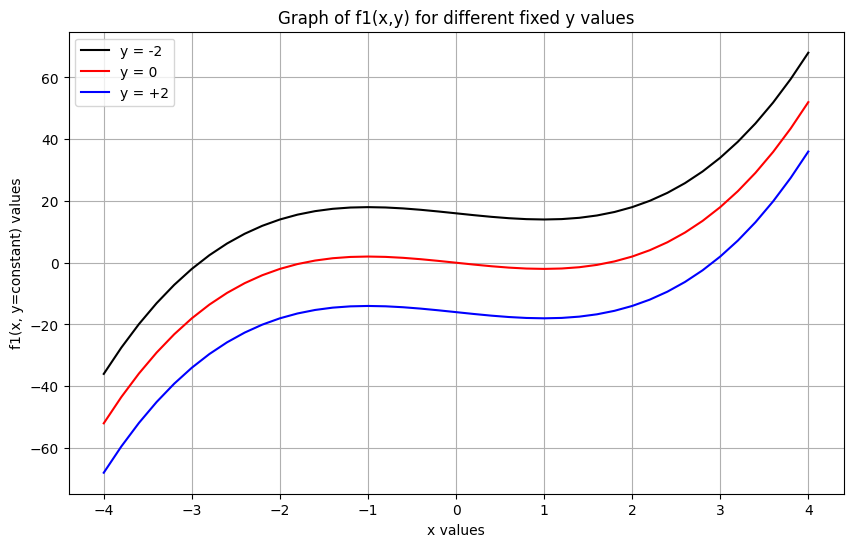

In [5]:
# Create array of x samples
xmin, xmax, nx = -4, 4, 41
tab_x = np.linspace(xmin, xmax, nx)

# Calculate values of f(x,y) for x values in tab_x and different y values
tab_zm2 = f1(tab_x, -2)
tab_z0 = f1(tab_x, 0)
tab_zp2 = f1(tab_x, 2)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(tab_x, tab_zm2, 'k-', label='y = -2')
plt.plot(tab_x, tab_z0, 'r-', label='y = 0')
plt.plot(tab_x, tab_zp2, 'b-', label='y = +2')
plt.xlabel('x values')
plt.ylabel('f1(x, y=constant) values')
plt.title('Graph of f1(x,y) for different fixed y values')
plt.legend()
plt.grid()
plt.show()


**2.2** Plot the graph of the function f1(x,y) for y ∈ [-4,4] and different fixed values of x.


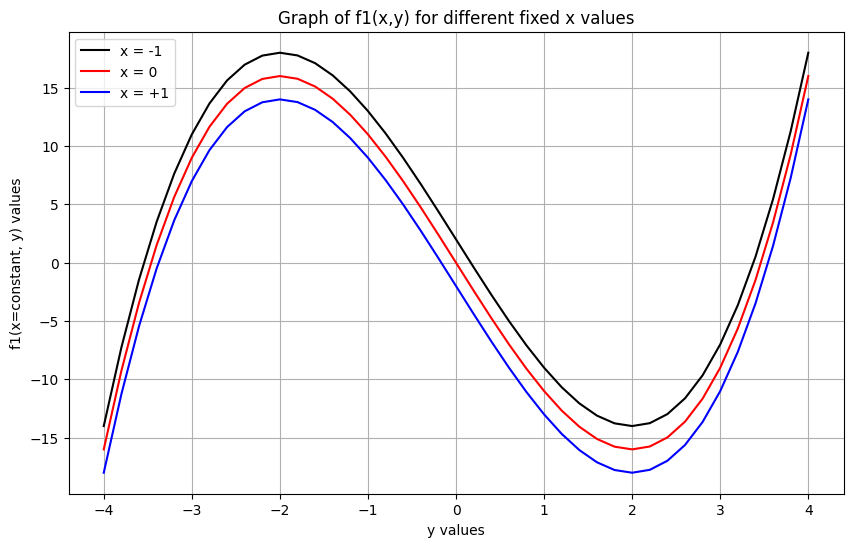

In [6]:
# Create array of y samples
ymin, ymax, ny = -4, 4, 41
tab_y = np.linspace(ymin, ymax, ny)

# Calculate values of f(x,y) for y values in tab_y and different x values
tab_zm1 = f1(-1, tab_y)
tab_z0 = f1(0, tab_y)
tab_zp1 = f1(1, tab_y)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(tab_y, tab_zm1, 'k-', label='x = -1')
plt.plot(tab_y, tab_z0, 'r-', label='x = 0')
plt.plot(tab_y, tab_zp1, 'b-', label='x = +1')
plt.xlabel('y values')
plt.ylabel('f1(x=constant, y) values')
plt.title('Graph of f1(x,y) for different fixed x values')
plt.legend()
plt.grid()
plt.show()


## Exercise 3: Plotting Contour Lines (Isovalues) of a Function of Two Variables

**3.1** Plot the contour lines (isovalues) of the function f1(x,y) for x ∈ [-4,4] and y ∈ [-4,4].


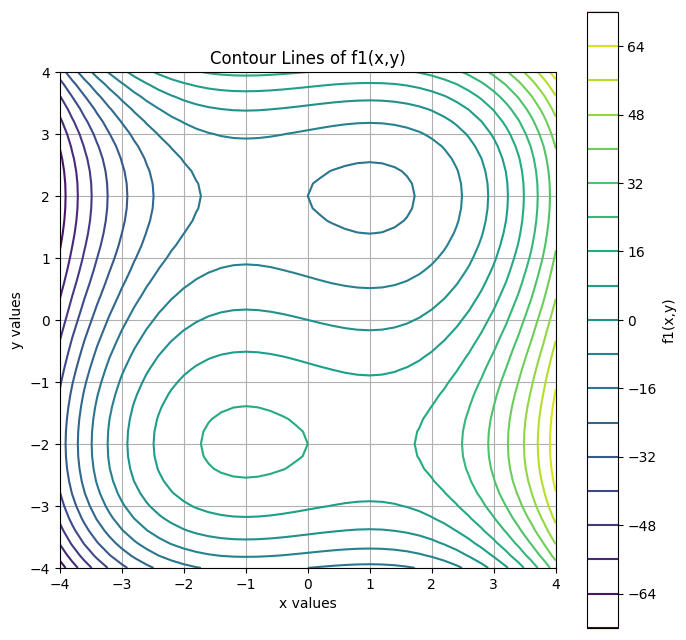

In [7]:
# Definition of the plotting domain
xmin, xmax, nx = -4, 4, 41
ymin, ymax, ny = -4, 4, 41

# Discretization of the plotting domain
x1d = np.linspace(xmin, xmax, nx)
y1d = np.linspace(ymin, ymax, ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Plot contour lines (isovalues) of f1
nIso = 21
plt.figure(figsize=(8, 8))
plt.contour(x2d, y2d, f1(x2d, y2d), nIso)
plt.title('Contour Lines of f1(x,y)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()
plt.axis('square')
plt.colorbar(label='f1(x,y)')
plt.show()


**3.2** On the contour line representation of f1, locate the critical points calculated in exercise 1.


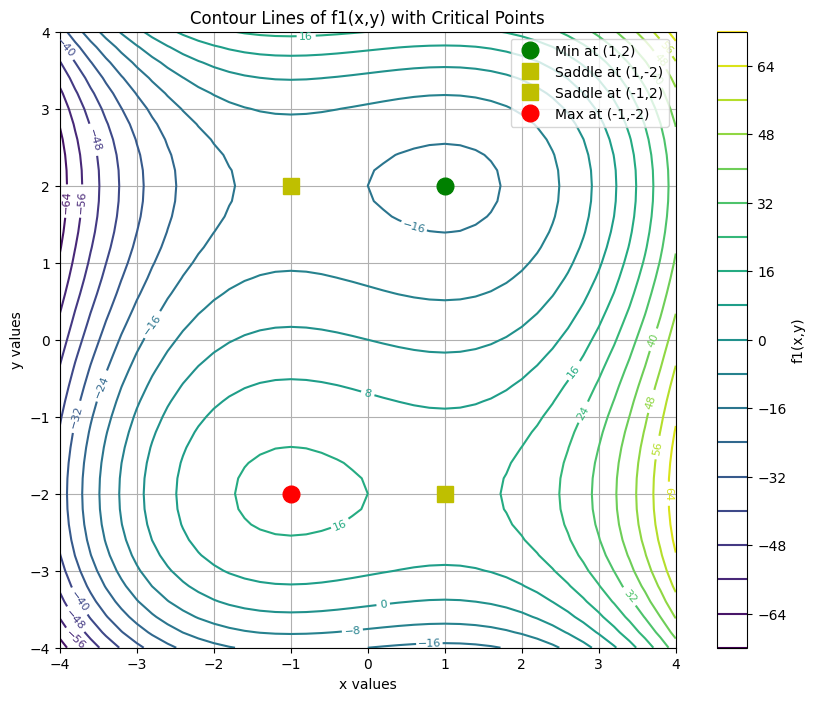

In [8]:
# Contour plot with critical points marked
plt.figure(figsize=(10, 8))
contour = plt.contour(x2d, y2d, f1(x2d, y2d), nIso)
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(label='f1(x,y)')

# Critical points of f1
critical_points = [(1, 2, 'min'), (1, -2, 'saddle'), (-1, 2, 'saddle'), (-1, -2, 'max')]

for x, y, pt_type in critical_points:
    if pt_type == 'min':
        plt.plot(x, y, 'go', markersize=12, label=f'Min at ({x},{y})')
    elif pt_type == 'max':
        plt.plot(x, y, 'ro', markersize=12, label=f'Max at ({x},{y})')
    else:
        plt.plot(x, y, 'ys', markersize=12, label=f'Saddle at ({x},{y})')

plt.title('Contour Lines of f1(x,y) with Critical Points')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc='upper right')
plt.grid()
plt.axis('square')
plt.show()


**3.3** Use contourf (filled contours) to visualize f1.


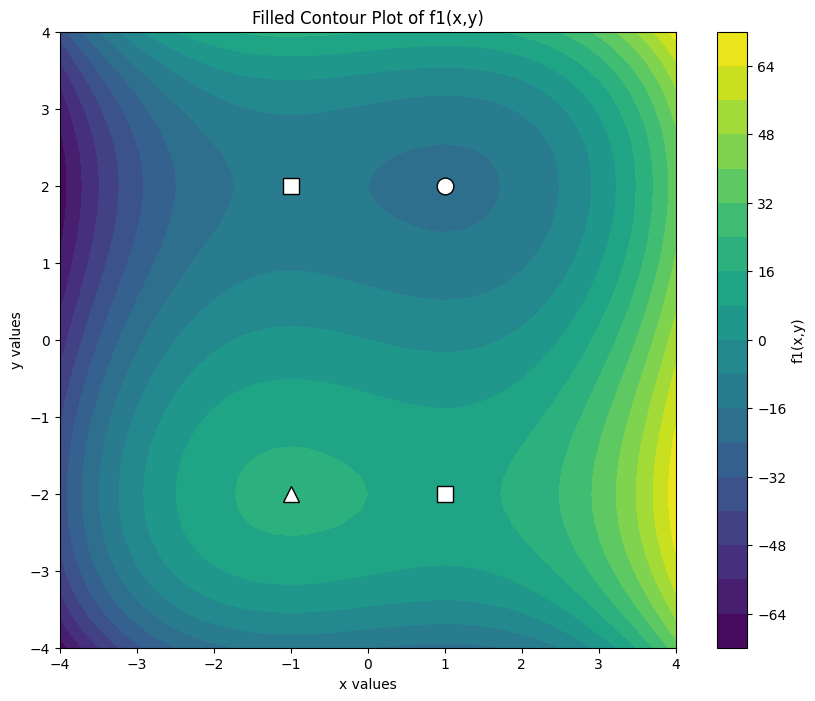

In [9]:
# Filled contour plot of f1
plt.figure(figsize=(10, 8))
contourf = plt.contourf(x2d, y2d, f1(x2d, y2d), nIso, cmap='viridis')
plt.colorbar(label='f1(x,y)')

# Mark critical points
for x, y, pt_type in critical_points:
    if pt_type == 'min':
        plt.plot(x, y, 'wo', markersize=12, markeredgecolor='black')
    elif pt_type == 'max':
        plt.plot(x, y, 'w^', markersize=12, markeredgecolor='black')
    else:
        plt.plot(x, y, 'ws', markersize=12, markeredgecolor='black')

plt.title('Filled Contour Plot of f1(x,y)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('square')
plt.show()


**3.4** Create a 3D surface plot of f1.


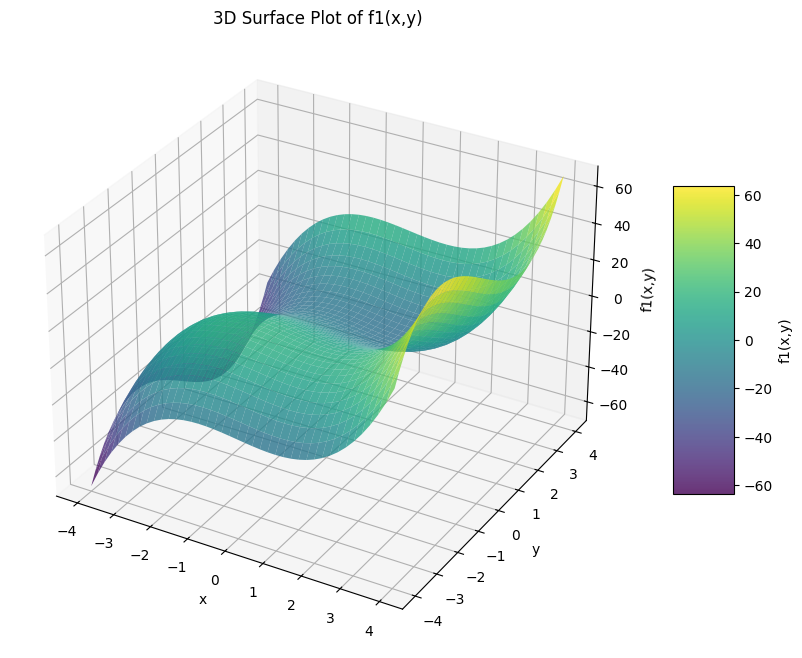

In [10]:
# 3D Surface plot of f1
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x2d, y2d, f1(x2d, y2d), cmap='viridis', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5, label='f1(x,y)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('3D Surface Plot of f1(x,y)')
plt.show()


**3.5** Redo questions 3.2, 3.3, and 3.4 for the function f2 from exercise 1.


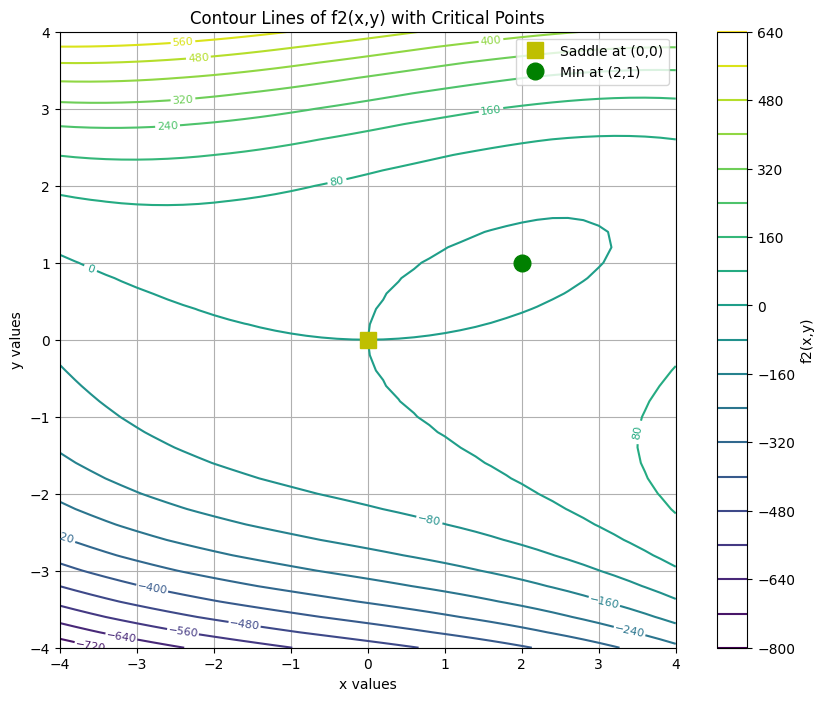

In [11]:
# Contour plot of f2 with critical points
plt.figure(figsize=(10, 8))
contour = plt.contour(x2d, y2d, f2(x2d, y2d), nIso)
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(label='f2(x,y)')

# Critical points of f2
critical_points_f2 = [(0, 0, 'saddle'), (2, 1, 'min')]

for x, y, pt_type in critical_points_f2:
    if pt_type == 'min':
        plt.plot(x, y, 'go', markersize=12, label=f'Min at ({x},{y})')
    else:
        plt.plot(x, y, 'ys', markersize=12, label=f'Saddle at ({x},{y})')

plt.title('Contour Lines of f2(x,y) with Critical Points')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.grid()
plt.axis('square')
plt.show()


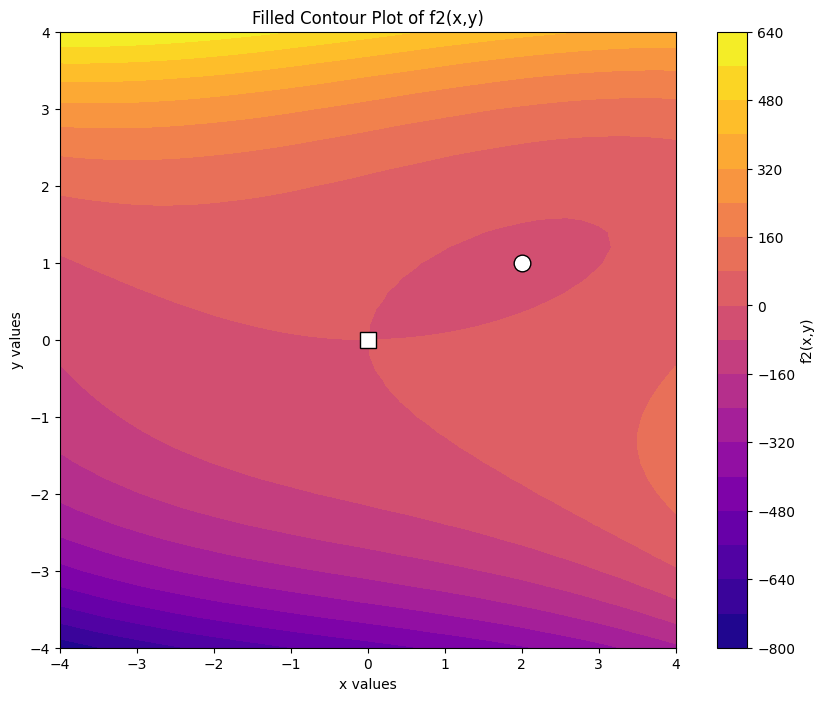

In [12]:
# Filled contour plot of f2
plt.figure(figsize=(10, 8))
contourf = plt.contourf(x2d, y2d, f2(x2d, y2d), nIso, cmap='plasma')
plt.colorbar(label='f2(x,y)')

# Mark critical points
for x, y, pt_type in critical_points_f2:
    if pt_type == 'min':
        plt.plot(x, y, 'wo', markersize=12, markeredgecolor='black')
    else:
        plt.plot(x, y, 'ws', markersize=12, markeredgecolor='black')

plt.title('Filled Contour Plot of f2(x,y)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('square')
plt.show()


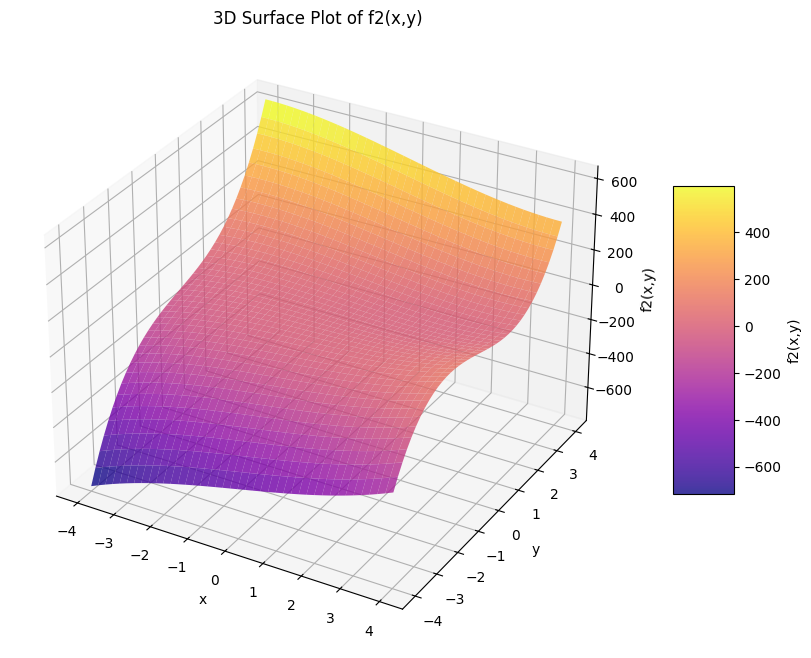

In [13]:
# 3D Surface plot of f2
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x2d, y2d, f2(x2d, y2d), cmap='plasma', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5, label='f2(x,y)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f2(x,y)')
ax.set_title('3D Surface Plot of f2(x,y)')
plt.show()


**Bonus:** Visualization of f3 (the Rosenbrock-like function)


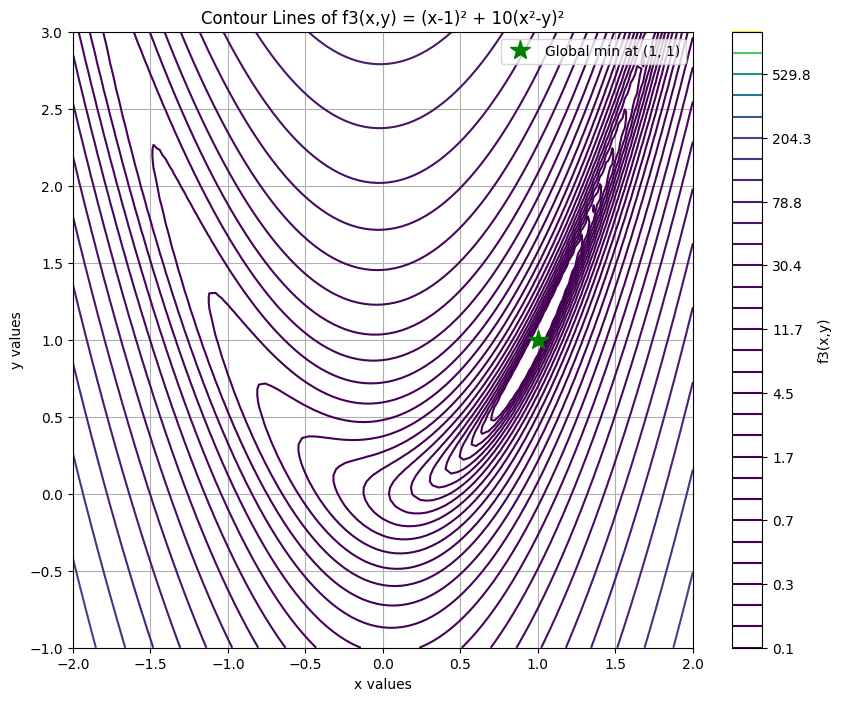

In [14]:
# Contour plot of f3 - using a focused domain around the minimum
xmin_f3, xmax_f3, nx_f3 = -2, 2, 101
ymin_f3, ymax_f3, ny_f3 = -1, 3, 101

x1d_f3 = np.linspace(xmin_f3, xmax_f3, nx_f3)
y1d_f3 = np.linspace(ymin_f3, ymax_f3, ny_f3)
x2d_f3, y2d_f3 = np.meshgrid(x1d_f3, y1d_f3)

plt.figure(figsize=(10, 8))
# Use log scale levels for better visualization of the "banana valley"
levels = np.logspace(-1, 3, 30)
contour = plt.contour(x2d_f3, y2d_f3, f3(x2d_f3, y2d_f3), levels)
plt.colorbar(label='f3(x,y)')

# Mark the global minimum at (1, 1)
plt.plot(1, 1, 'g*', markersize=15, label='Global min at (1, 1)')

plt.title('Contour Lines of f3(x,y) = (x-1)² + 10(x²-y)²')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.grid()
plt.show()


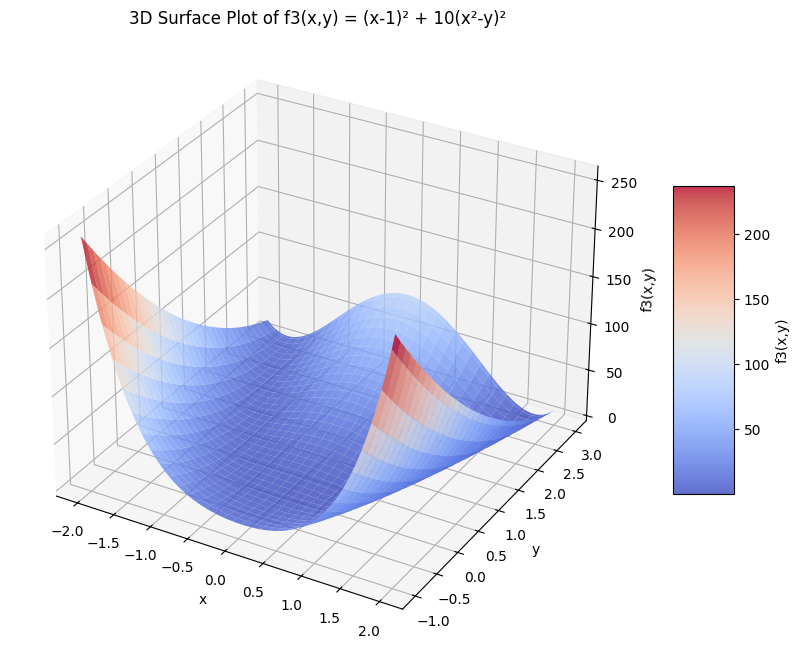

In [15]:
# 3D Surface plot of f3
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x2d_f3, y2d_f3, f3(x2d_f3, y2d_f3), cmap='coolwarm', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5, label='f3(x,y)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f3(x,y)')
ax.set_title('3D Surface Plot of f3(x,y) = (x-1)² + 10(x²-y)²')
plt.show()


## Summary

In this lab, we have:

1. **Analytically determined critical points** for three multivariate functions:
   - f1(x,y) = x³ + y³ - 3x - 12y has 4 critical points: 1 minimum, 1 maximum, 2 saddle points
   - f2(x,y) = x³ - 12xy + 8y³ has 2 critical points: 1 minimum, 1 saddle point
   - f3(x,y) = (x-1)² + 10(x²-y)² has 1 critical point: the global minimum at (1,1)

2. **Visualized the functions** using:
   - 1D slices (fixing one variable)
   - 2D contour plots (level curves)
   - 2D filled contour plots
   - 3D surface plots

3. **Key observations**:
   - Contour lines help identify the nature of critical points visually
   - Minima appear as centers of closed contours with decreasing values
   - Maxima appear as centers of closed contours with increasing values
   - Saddle points appear where contour lines form "X" shapes
